In [78]:
#fonctions completees dans etu2.py
from etu2 import *

### Partie I: Perceptron
#### 1.1-1.2: Les images

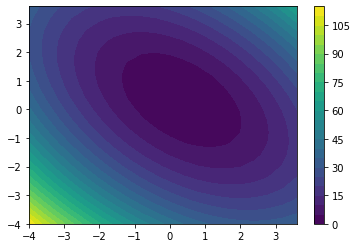

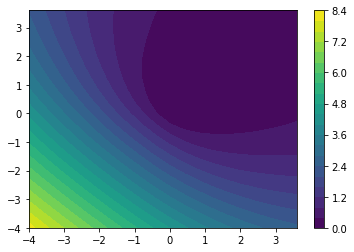

Précision : train 0.912000, test 0.906000


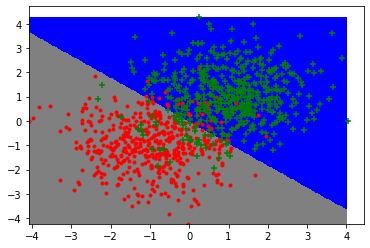

In [2]:
plt.ion()
trainx,trainy =  gen_arti(nbex=1000,data_type=0,epsilon=1)
testx,testy =  gen_arti(nbex=1000,data_type=0,epsilon=1)
plt.figure()
plot_error(trainx,trainy,mse)
plt.figure()
plot_error(trainx,trainy,hinge)
perceptron = Lineaire(hinge,hinge_g,max_iter=1000,eps=0.1)
perceptron.fit(trainx,trainy)
print("Précision : train %f, test %f"% (perceptron.score(trainx,trainy),perceptron.score(testx,testy)))
plt.figure()
plot_frontiere(trainx,perceptron.predict,200)
plot_data(trainx,trainy)

#### 1.3 Prise en compte d'un biais

In [16]:
train_biais=datax_with_biais(trainx)
print(train_biais.shape)

(1000, 3)


In [20]:
perceptron = Lineaire(hinge,hinge_g,max_iter=1000,eps=0.1)
perceptron.fit(train_biais,trainy)

In [21]:
test_biais=datax_with_biais(testx)
print("Précision : train %f, test %f"% (perceptron.score(train_biais,trainy),perceptron.score(test_biais,testy)))

Précision : train 0.911000, test 0.902000


#### Conclusion: l'ajout d'un biais dans cet exemple n'a pas beaucoup d'influence

#### 1.4 bonus: stochastique

In [25]:
perceptron2 = Lineaire(hinge_stochastique,hinge_g_stochastique,max_iter=1000,eps=0.1)
perceptron2.fit(trainx,trainy)

In [28]:
print("Précision : train %f, test %f"% (perceptron2.score(trainx,trainy),perceptron2.score(testx,testy)))

Précision : train 0.847000, test 0.844000


#### Conclusion: Stochastique a un resultat moins bon

### Partie II: Donnees USPS

#### 2.1 Probleme de 2 classes

In [3]:
X,Y=load_usps("USPS_train.txt")
x,y=load_usps("USPS_test.txt")

In [4]:
train_X,train_Y = X[(Y==6)|(Y==9)],Y[(Y==6)|(Y==9)]
train_Y = np.where(train_Y==6,-1,1)
test_x,test_y = x[(y==6)|(y==9)],y[(y==6)|(y==9)]
test_y = np.where(test_y==6,-1,1)

In [5]:
perceptron = Lineaire(hinge,hinge_g,max_iter=1000,eps=0.1)
perceptron.fit(train_X,train_Y)

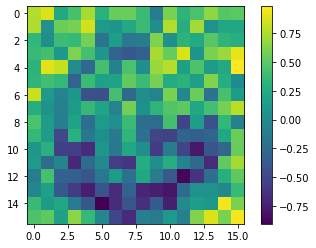

In [6]:
plt.imshow(perceptron.w.reshape((16,16)))
plt.colorbar()

In [7]:
perceptron.score(test_x,test_y)

0.9971181556195965

#### 2.2 Perceptron avec une classe

In [45]:
train_Y = np.where(Y==6,-1,1)
test_y = np.where(y==6,-1,1)

In [46]:
perceptron2 = Lineaire(hinge,hinge_g,max_iter=1000,eps=0.1)
perceptron2.fit(X,train_Y)

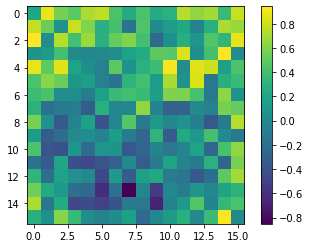

In [47]:
plt.imshow(perceptron2.w.reshape((16,16)))
plt.colorbar()

In [49]:
perceptron2.score(x,test_y)

0.9830592924763328

#### Conclusion: perceptron avec une classe a un resultat un peu faible

#### 2.3 La courbe d'erreurs(probleme de deux classes)

In [50]:
train_X,train_Y = X[(Y==6)|(Y==9)],Y[(Y==6)|(Y==9)]
train_Y = np.where(train_Y==6,-1,1)
test_x,test_y = x[(y==6)|(y==9)],y[(y==6)|(y==9)]
test_y = np.where(test_y==6,-1,1)

In [53]:
list_iter=[1000,1500,2000,2500,3000,3500]
taux_error=[]
for i in range(len(list_iter)):
    print(list_iter[i])
    perceptron3 = Lineaire(hinge,hinge_g,max_iter=list_iter[i],eps=0.1)
    perceptron3.fit(train_X,train_Y)
    taux_error.append(perceptron3.score(test_x,test_y))

1000
1500
2000
2500
3000
3500


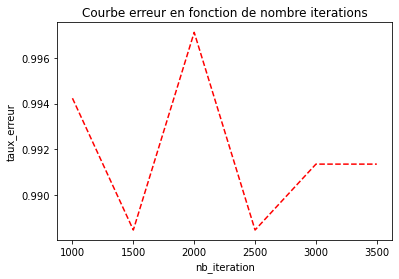

In [54]:
l=plt.plot(list_iter,taux_error,'r--')
plt.title('Courbe erreur en fonction de nombre iterations')
plt.xlabel('nb_iteration')
plt.ylabel('taux_erreur')
plt.show()

In [55]:
print(taux_error)

[0.9942363112391931, 0.9884726224783862, 0.9971181556195965, 0.9884726224783862, 0.9913544668587896, 0.9913544668587896]


### Partie III: Projection&Kernal Perceptron 
Quand on prend type=2 pour la fonction gen_arti(), les points ne sont pas lineairement separable  
kernal function:(x1,x2)-->(x1,x2,x1x2,x1^2,x2^2)

In [56]:
trainx,trainy =  gen_arti(nbex=1000,data_type=2,epsilon=1)
testx,testy =  gen_arti(nbex=1000,data_type=2,epsilon=1)

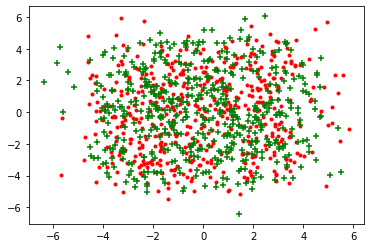

In [94]:
plot_data(trainx,trainy)

#### Kernal methode: Polynomial Kernel

In [82]:
def project_polynomiale(datax):
    if(datax.shape[1]==2):
        x1x2=datax[:,0]*datax[:,1]
        x12=datax[:,0]**2
        x22=datax[:,1]**2

        x=np.hstack((datax,x1x2.reshape(-1,1)))
        x=np.hstack((x,x12.reshape(-1,1)))
        x=np.hstack((x,x22.reshape(-1,1)))
        return x

In [83]:
train_project=project_polynomiale(trainx)

In [84]:
test_project=project_polynomiale(testx)

In [86]:
print(train_project.shape)
print(test_project.shape)

(1000, 5)
(1000, 5)


In [90]:
perceptron4 = Lineaire(hinge,hinge_g,max_iter=list_iter[i],eps=0.1)
perceptron4.fit(train_project,trainy)

In [91]:
perceptron4.score(test_project,testy)

0.503

In [100]:
plt.figure()
plot_frontiere(train_project,perceptron4.predict,20)

ValueError: shapes (400,2) and (5,1) not aligned: 2 (dim 1) != 5 (dim 0)

<Figure size 432x288 with 0 Axes>